In [7]:
# imports
from os.path import abspath, join, dirname, normpath, basename
from os import makedirs, rename, rmdir
import requests, zipfile, io
import shutil
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# Read all data
# Considered 2016, 2017, 2018, 2019 and 2022 data about the remote
# 2018 was omitted in the later stage, since it is not asking about frequency of remote work but priority
data_folder = join(dirname(abspath('')), 'data')
makedirs(data_folder, exist_ok=True)
# data_2014 = pd.read_csv(join(data_folder, '2014 Stack Overflow Survey Responses.csv'))
# # Remote work - Do you work remotely?
# # Remote work satisfaction - Do you enjoy working remotely?
#
# data_2015 = pd.read_csv(join(data_folder, '2015 Stack Overflow Developer Survey Responses.csv'))
# # Remote work? - Remote Status
#
data_2016 = pd.read_csv(join(data_folder, '2016 Stack Overflow Survey Responses.csv'))
# # remote? - remote
# # missing values
# # Never

# # I rarely work remotely
# # Part-time

# # Full-time remote


data_2017 = pd.read_csv(join(data_folder, 'survey_results_public2017.csv'))
# remote? - HomeRemote
# NA
# Never

# A few days each month
# Less than half the time, but at least one day each week
# More than half, but not all, the time
# It's complicated

# All or almost all the time (I'm full-time remote)


data_2018 = pd.read_csv(join(data_folder, 'survey_results_public2018.csv'))
# AssessJob7 - "Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the
# job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10
# is the least important. The opportunity to work from home/remotely"
# 1 to 10

data_2019 = pd.read_csv(join(data_folder, 'survey_results_public2019.csv'))
# WorkRemote - How often do you work remotely?
# NA
# Less than once per month / Never

# A few days each month
# Less than half the time, but at least one day each week
# About half the time
# More than half, but not all, the time
# It's complicated

# All or almost all the time (I'm full-time remote)


# WorkLoc - Where would you prefer to work?


data_2022 = pd.read_csv(join(data_folder, 'survey_results_public2022.csv'))
# remote? - RemoteWork
# NA
# Full in-person
# Hybrid (some remote, some in-person)
# Fully remote



C:\Users\YJ\AppData\Local\Temp\ipykernel_4872\442264408.py:37: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv(join(data_folder, 'survey_results_public2018.csv'))


In [10]:
# helper method, not used yet
# create plots of selected column `col` from the data `da`
def plots_col(da, col):
    fig, axs = plt.subplots(nrows=2)

    sns.histplot(
        da[col],
        kde=True,
        ax=axs[0]
    )

    sns.stripplot(
        da[col],
        orient='h',
        jitter=0.4,
        size=3,
        ax=axs[1],
        alpha=0.3
    )
    sns.boxplot(
        da[col],
        orient='h',
        width=0.4,
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(da[col]) * 0.05
    xmin = np.min(da[col]) - spacer
    xmax = np.max(da[col]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)

    # Adjust boxplot fill to be white
    axs[1].set_facecolor('white')


# Setup data
data_folder = join(dirname(abspath('')), 'data')
makedirs(data_folder, exist_ok=True)

In [11]:
def print_remote_metrics(da, col):
    print(da[col].value_counts())
    print(da[col].value_counts() / len(da[col]))
    print('NA counts:')
    print(da[col].isna().sum())


# column names for each year
column_names = {
    '2016': 'remote',
    '2017': 'HomeRemote',
    '2019': 'WorkRemote',
    '2022': 'RemoteWork'
}

In [12]:
# remote_2016 = data_2016['remote']
# remote_2017 = data_2017['HomeRemote']
# remote_2018 = data_2018['AssessJob7']
# remote_2019 = data_2019['WorkRemote']
# remote_2022 = data_2022['RemoteWork']

In [25]:
data_2016['remote'] = data_2016['remote'].fillna('Not Applicable')
data_2017['HomeRemote'] = data_2017['HomeRemote'].fillna('Not Applicable')
data_2019['WorkRemote'] = data_2019['WorkRemote'].fillna('Not Applicable')
data_2022['RemoteWork'] = data_2022['RemoteWork'].fillna('Not Applicable')
# # drop NAs doesn't work
# for year, column_name in column_names.items():
#     print(f"Year {year}:")
#     globals()[f"data_{year}"].dropna(subset=[column_name])
#     print("------------------")

In [26]:
for year, column_name in column_names.items():
    print(f"Year {year}:")
    print_remote_metrics(globals()[f"data_{year}"], column_name)
    print("------------------")

Year 2016:
Hybrid            26300
Not Applicable    15912
Full in-person     8946
Fully remote       4872
Name: remote, dtype: int64
Hybrid            0.469391
Not Applicable    0.283991
Full in-person    0.159664
Fully remote      0.086953
Name: remote, dtype: float64
NA counts:
0
------------------
Year 2017:
Hybrid            25128
Full in-person    13975
Not Applicable     7384
Fully remote       4905
Name: HomeRemote, dtype: int64
Hybrid            0.488948
Full in-person    0.271929
Not Applicable    0.143680
Fully remote      0.095443
Name: HomeRemote, dtype: float64
NA counts:
0
------------------
Year 2019:
Hybrid            31599
Full in-person    30220
Not Applicable    18599
Fully remote       8465
Name: WorkRemote, dtype: int64
Hybrid            0.355512
Full in-person    0.339998
Not Applicable    0.209253
Fully remote      0.095238
Name: WorkRemote, dtype: float64
NA counts:
0
------------------
Year 2022:
Fully remote      25341
Hybrid            25021
Not Applicable  

In [27]:
# mapping different categorical data throughout the years to the same naming convention in 2022
# namely, Full in-person, Hybrid and Fully remote
remote_mappings = {
    '2016': {
        'Never': 'Full in-person',
        'I rarely work remotely': 'Hybrid',
        'Part-time remote': 'Hybrid',
        'Full-time remote': 'Fully remote'
    },
    '2017': {
        'Never': 'Full in-person',
        'A few days each month': 'Hybrid',
        'Less than half the time, but at least one day each week': 'Hybrid',
        'About half the time': 'Hybrid',
        'More than half, but not all, the time': 'Hybrid',
        'It\'s complicated': 'Hybrid',
        'All or almost all the time (I\'m full-time remote)': 'Fully remote'
    },
    '2019': {
        'Less than once per month / Never': 'Full in-person',
        'A few days each month': 'Hybrid',
        'Less than half the time, but at least one day each week': 'Hybrid',
        'About half the time': 'Hybrid',
        'More than half, but not all, the time': 'Hybrid',
        'It\'s complicated': 'Hybrid',
        'All or almost all the time (I\'m full-time remote)': 'Fully remote'
    }
    ,
    '2022': {
        'Full in-person': 'Full in-person',
        'Hybrid (some remote, some in-person)': 'Hybrid',
        'Fully remote': 'Fully remote'
    }
}

for year, mappings in remote_mappings.items():
    if year == '2016':
        column_name = 'remote'
    elif year == '2017':
        column_name = 'HomeRemote'
    elif year == '2019':
        column_name = 'WorkRemote'
    else:
        column_name = 'RemoteWork'
    data = globals()[f"data_{year}"]
    data[column_name] = data[column_name].replace(mappings)


In [28]:
for year, column_name in column_names.items():
    print(f"Year {year}:")
    print_remote_metrics(globals()[f"data_{year}"], column_name)
    print("------------------")

Year 2016:
Hybrid            26300
Not Applicable    15912
Full in-person     8946
Fully remote       4872
Name: remote, dtype: int64
Hybrid            0.469391
Not Applicable    0.283991
Full in-person    0.159664
Fully remote      0.086953
Name: remote, dtype: float64
NA counts:
0
------------------
Year 2017:
Hybrid            25128
Full in-person    13975
Not Applicable     7384
Fully remote       4905
Name: HomeRemote, dtype: int64
Hybrid            0.488948
Full in-person    0.271929
Not Applicable    0.143680
Fully remote      0.095443
Name: HomeRemote, dtype: float64
NA counts:
0
------------------
Year 2019:
Hybrid            31599
Full in-person    30220
Not Applicable    18599
Fully remote       8465
Name: WorkRemote, dtype: int64
Hybrid            0.355512
Full in-person    0.339998
Not Applicable    0.209253
Fully remote      0.095238
Name: WorkRemote, dtype: float64
NA counts:
0
------------------
Year 2022:
Fully remote      25341
Hybrid            25021
Not Applicable  

In [30]:
remotes_labels = ['Not Applicable','Full in-person', 'Hybrid','Fully remote']

In [31]:
def compute_remotes_pct_over_years(pct,lbl,cols):
    # Compute the percentage of respondents for each year
    for yr, col in cols.items():
        da = globals()[f"data_{yr}"]
        pct.append(da[col].value_counts(normalize=True)[lbl])
    return pct

In [37]:
def plot_remotes_pct_over_years(pct,lbl):
    # Plot the percentage of respondents who work remotely over time
    plt.bar(['2016', '2017', '2019', '2022'], pct)
    plt.title('Percentage of respondents who work ' + lbl+' over time')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.ylim([0, 1])
    plt.show()

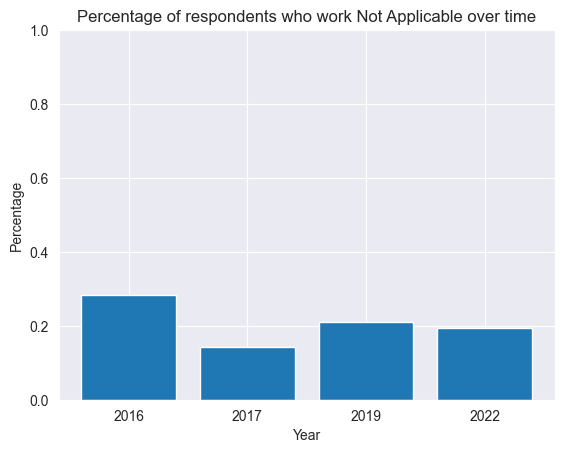

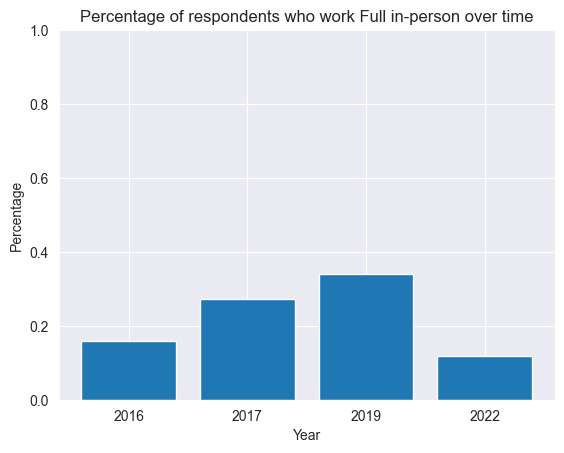

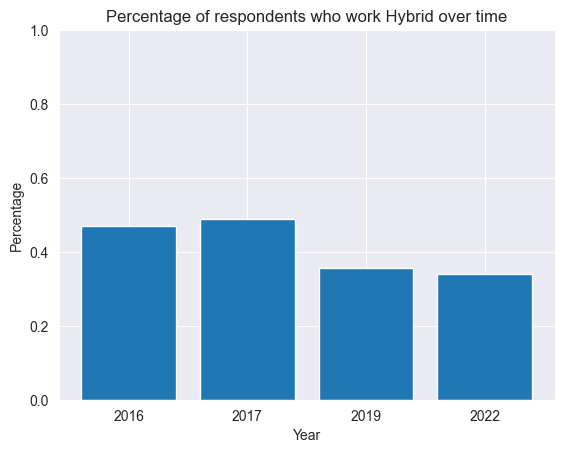

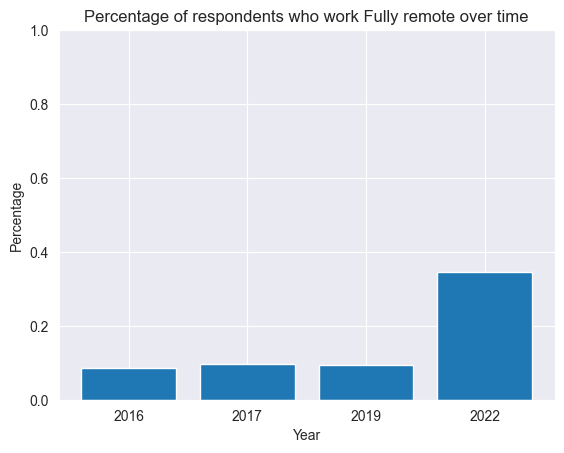

In [38]:
not_applicable_pct = []
full_in_person_pct = []
hybrid_pct = []
fully_remote_pct = []

remotes_pct = [
    not_applicable_pct,
    full_in_person_pct,
    hybrid_pct,
    fully_remote_pct
]

for label,percentage in zip(remotes_labels,remotes_pct):
    percentage = compute_remotes_pct_over_years(percentage,label,column_names)
    plot_remotes_pct_over_years(percentage,label)

